# Ismail Olumegbon (Phy 640_2022)

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats

# Question 1.1

In [24]:
def random_walker_1d(Nw,Ns,dL,dt):
    X = np.zeros([Nw,Ns])
    time = np.arange(1,Ns/dt + 1)
    fig,ax=plt.subplots(figsize = [11,8])
    for i in range(Nw):
        for j in range(1,Ns):
            RN =np.random.random()
            if RN <=0.5:
                X[i,j] = X[i,j-1] + dL
            else:
                X[i,j] = X[i,j-1] - dL
        ax.plot(X[i,:])
    ax.set_xlabel('time (s)')
    ax.set_ylabel("WAlker's position (x)")
    
    return X, time

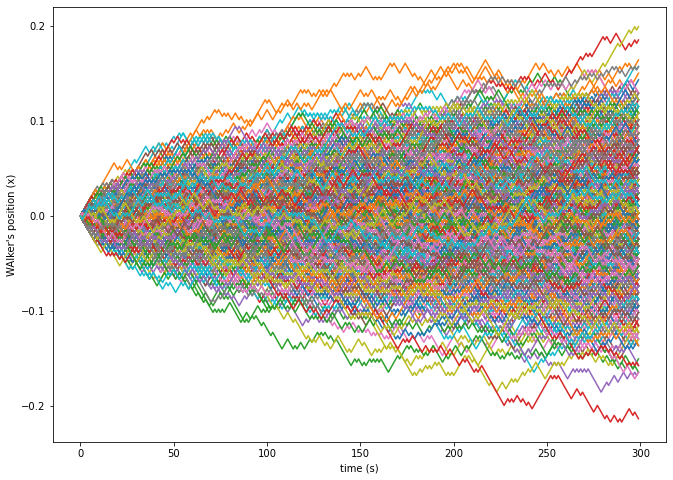

In [25]:
Nw = 1000
Ns = 300
dL = 3.5*10**-3
dt = 1
X, time = random_walker_1d(Nw,Ns,dL,dt)

# Question 1.2 and 1.3

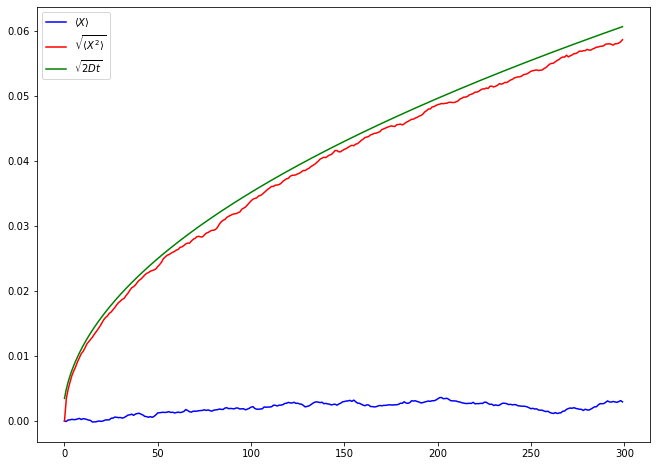

In [27]:
fig,ax = plt.subplots(figsize = [11,8])
X_mean = np.mean(X,axis=0)
Xsq_mean = np.mean(X**2,axis=0)
Xsq = np.sqrt(Xsq_mean)
D = (dL**2)/(2*dt)
Xsqrt = np.sqrt(2*D*time)

ax.plot(X_mean,c='b',label=r'$\langle X \rangle$')
ax.plot(Xsq,c='r',label=r'$\sqrt{\langle X^2 \rangle}$')
ax.plot(Xsqrt,c='g',label=r'$\sqrt{2Dt}$')
ax.legend()

# Question 1.4

Text(0, 0.5, 'Number density function P(x,t)')

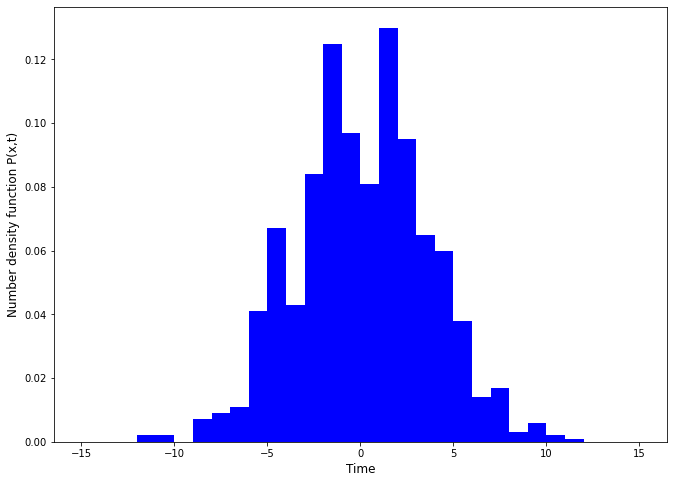

In [28]:
def random_walker_function(Nw,Ns,dL):
    X = np.zeros([Nw,Ns])
    for i in range(Nw):
        for j in range(1,Ns):
            RN =np.random.random()
            if RN >=0.5:
                X[i,j] = X[i,j-1] + dL
            else:
                X[i,j] = X[i,j-1] - dL
    return X

plt.figure(figsize=(11,8))
Nw = 1000
Ns = 300
dL = 0.3

x_1= random_walker_function(Nw,Ns,dL)
steps=150
dx = 1
l = np.arange(-15,15+dx/2,dx)
nx1, bins, patches = plt.hist(x_1[:,steps],bins=l,density =1,facecolor='blue')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number density function P(x,t)',fontsize=12)

# Question 1.5 

In [29]:
def Normalized_NDF(x,D,t):
  Pbar= (1/np.sqrt(4*np.pi*D*t))*np.exp(-x**2/(4*D*t))
  return Pbar

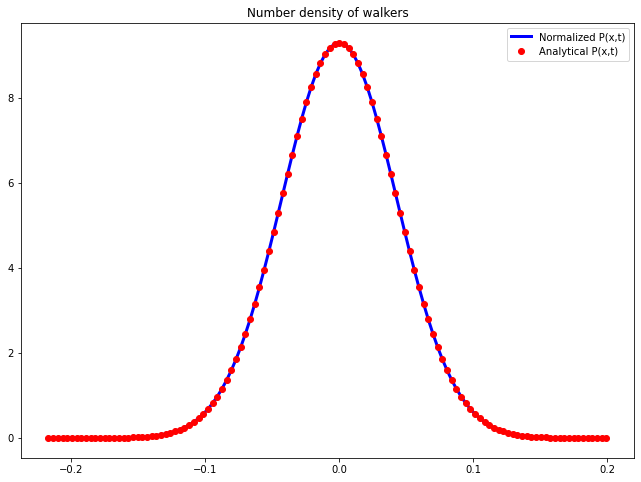

In [40]:
steps = 150
dL = 3.5*10**-3
xbin = np.arange(np.min(X), np.max(X)+dL/2, dL)
Pbar=Normalized_NDF(xbin, D, 150)

#analytical solution
func = stats.norm(0.0, np.sqrt(steps)*dL)
y = func.pdf(xbin)

fig,ax = plt.subplots(figsize = [11,8])
ax.plot(xbin, Pbar,lw=3, c='b',label=r'Normalized P(x,t)')
ax.plot(xbin,y,'o',c='r',label=r'Analytical P(x,t)')
ax.legend()
plt.title("Number density of walkers")
plt.show()